In [ ]:
!pip install pycaret[full]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("/content/USA_Housing.csv")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

In [ ]:
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

In [ ]:
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4500, 7)
Unseen Data For Predictions: (500, 7)


In [ ]:
data.drop('Address',axis=1,inplace=True)

In [ ]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,101928.858060,4.829586,9.039382,4.08,22804.991935,1.938866e+06
1,63615.994253,6.021179,8.512698,6.31,44761.719375,1.385777e+06
2,54453.081618,5.635768,7.152987,5.38,40552.086904,9.999707e+05
3,85048.195867,4.552060,6.492893,4.38,23662.584871,1.211443e+06
4,60940.707967,6.932926,5.953347,4.37,31113.486403,9.874347e+05


##  Setup

In [ ]:
from pycaret.regression import *
s = setup(data = data, target = 'Price', session_id=123)

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(4500, 6)"
4,Transformed data shape,"(4500, 6)"
5,Transformed train set shape,"(3150, 6)"
6,Transformed test set shape,"(1350, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


 ## Compare Models

In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,81941.2477,10390580838.4000,101849.1336,0.9147,0.1026,0.0761,0.5110
lasso,Lasso Regression,81939.9797,10390266572.8000,101847.6141,0.9147,0.1026,0.0761,0.0750
ridge,Ridge Regression,81940.2695,10390282547.2000,101847.6891,0.9147,0.1027,0.0761,0.0680
lar,Least Angle Regression,81940.0047,10390271795.2000,101847.6398,0.9147,0.1026,0.0761,0.0690
llar,Lasso Least Angle Regression,81939.9805,10390268006.4000,101847.6227,0.9147,0.1026,0.0761,0.0760
catboost,CatBoost Regressor,87287.1664,11890143198.5467,108978.4827,0.9023,0.1138,0.0831,3.3420
gbr,Gradient Boosting Regressor,89033.0977,12418896735.6831,111383.3033,0.8979,0.1168,0.0857,0.6460
lightgbm,Light Gradient Boosting Machine,92369.4952,13447016547.0363,115857.7800,0.8895,0.1240,0.0900,0.4340
et,Extra Trees Regressor,93314.7491,13767022763.8377,117202.8277,0.8869,0.1285,0.0931,1.2990
en,Elastic Net,99010.5906,15170306764.8000,123019.6641,0.8755,0.1295,0.0963,0.0740


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,146618.2626,34387998412.1501,185440.0130,0.7296,0.1724,0.1322
1,137337.6324,29476801908.6381,171688.0948,0.7368,0.1663,0.1272
2,156570.3638,37930569071.4966,194757.7189,0.6961,0.1956,0.1470
3,142314.3977,31792810589.1280,178305.3858,0.7370,0.1712,0.1264
4,143127.5138,31544234690.5403,177606.9669,0.7525,0.2159,0.1612
5,131895.3257,28293018555.8603,168205.2869,0.7699,0.1650,0.1222
6,147637.5679,33754190223.5125,183723.1347,0.7234,0.2002,0.1505
7,147380.6921,34347634549.1500,185331.1484,0.7158,0.1899,0.1397
8,135805.3207,31573385424.7460,177689.0132,0.7161,0.1972,0.1322


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lasso = create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,82806.6484,10764539904.0000,103752.2969,0.9154,0.1023,0.0754
1,78094.3281,9413876736.0000,97025.1328,0.9160,0.1015,0.0739
2,84660.8359,11315962880.0000,106376.5156,0.9093,0.1051,0.0793
3,85468.3984,11104636928.0000,105378.5391,0.9081,0.1022,0.0763
4,78885.5625,9234531328.0000,96096.4688,0.9275,0.1079,0.0751
5,86334.2812,11656465408.0000,107965.1094,0.9052,0.1105,0.0787
6,81800.3203,10054473728.0000,100272.0000,0.9176,0.1062,0.0804
7,83369.4609,10397268992.0000,101967.0000,0.9140,0.0966,0.0758
8,75775.0312,9179011072.0000,95807.1562,0.9175,0.0927,0.0699


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
huber = create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,180456.3567,47802346429.6404,218637.4772,0.6241,0.2154,0.1771
1,176024.8216,48354661264.8933,219896.9333,0.5683,0.2231,0.1772
2,195634.1205,57286905086.6798,239346.8301,0.5410,0.2277,0.1912
3,186550.4633,53481714365.5830,231261.1389,0.5576,0.2120,0.1727
4,197974.4065,59459260673.1175,243842.6966,0.5335,0.2756,0.2408
5,185728.5683,56949986244.8964,238641.9625,0.5368,0.2220,0.1760
6,188747.9276,55843240987.4741,236311.7453,0.5425,0.2630,0.2163
7,197748.7129,59956708505.8691,244860.5899,0.5040,0.2350,0.1908
8,180487.6388,49406678960.2235,222276.1322,0.5558,0.2215,0.1807


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Analyze Model

In [ ]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,139353.5695,31393359058.5665,177181.7120,0.7532,0.1780,0.1274
1,128976.1609,25396550119.1942,159362.9509,0.7733,0.1637,0.1227
2,138975.8888,31125918049.8682,176425.3895,0.7506,0.1715,0.1289
3,134991.4932,28849400227.1628,169851.1119,0.7614,0.1594,0.1171
4,130015.4865,26288601817.9301,162137.6015,0.7937,0.2120,0.1574
5,133883.1889,28905928387.7618,170017.4355,0.7649,0.1645,0.1227
6,137724.1719,29667433058.9223,172242.3672,0.7569,0.1957,0.1446
7,146934.1301,33246301725.0940,182335.6842,0.7249,0.1805,0.1364
8,131421.2949,27730617229.2695,166525.1249,0.7507,0.1726,0.1251


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
print(tuned_dt)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=1.0,
                      min_impurity_decrease=0.01, min_samples_leaf=2,
                      min_samples_split=9, random_state=123)


In [ ]:
tuned_lasso = tune_model(lasso)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,82806.4141,10764380160.0000,103751.5312,0.9154,0.1023,0.0754
1,78093.0156,9413716992.0000,97024.3125,0.9160,0.1015,0.0739
2,84662.0234,11316211712.0000,106377.6875,0.9093,0.1051,0.0793
3,85468.0859,11104491520.0000,105377.8516,0.9081,0.1022,0.0763
4,78886.0156,9234695168.0000,96097.3203,0.9275,0.1079,0.0751
5,86332.8516,11656000512.0000,107962.9609,0.9052,0.1105,0.0787
6,81800.1172,10054480896.0000,100272.0312,0.9176,0.1062,0.0804
7,83369.8516,10397407232.0000,101967.6797,0.9140,0.0966,0.0758
8,75774.5078,9178925056.0000,95806.7031,0.9175,0.0927,0.0699


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
print(tuned_lasso)

Lasso(random_state=123)


In [ ]:
tuned_huber = tune_model(huber)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,180456.4714,47802412230.2431,218637.6277,0.6241,0.2154,0.1771
1,176032.9606,48214955213.9474,219579.0409,0.5695,0.2222,0.1766
2,195301.3724,57348053782.6216,239474.5368,0.5405,0.2281,0.1911
3,185878.0637,53125906818.8871,230490.5786,0.5605,0.2115,0.1722
4,195976.8801,58306388325.3945,241467.1579,0.5425,0.2738,0.2385
5,185711.4334,56942205780.6213,238625.6604,0.5368,0.2220,0.1760
6,188748.2193,55843481633.5552,236312.2545,0.5425,0.2630,0.2163
7,197744.6833,59952969359.8417,244852.9546,0.5040,0.2350,0.1908
8,180497.1551,49411396556.4497,222286.7440,0.5558,0.2215,0.1807


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
print(tuned_huber)

HuberRegressor(alpha=0.9, epsilon=1.2, fit_intercept=False)


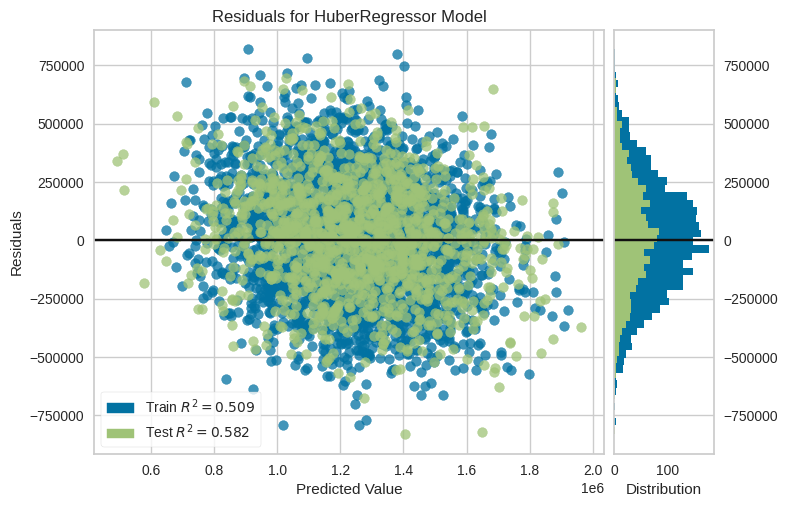

In [ ]:
plot_model(tuned_huber)

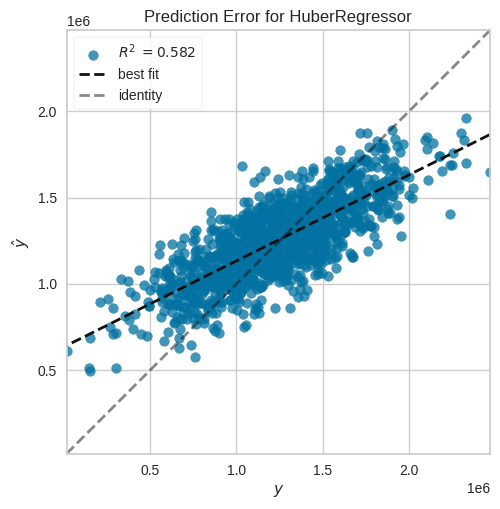

In [ ]:
plot_model(tuned_huber, plot = 'error')

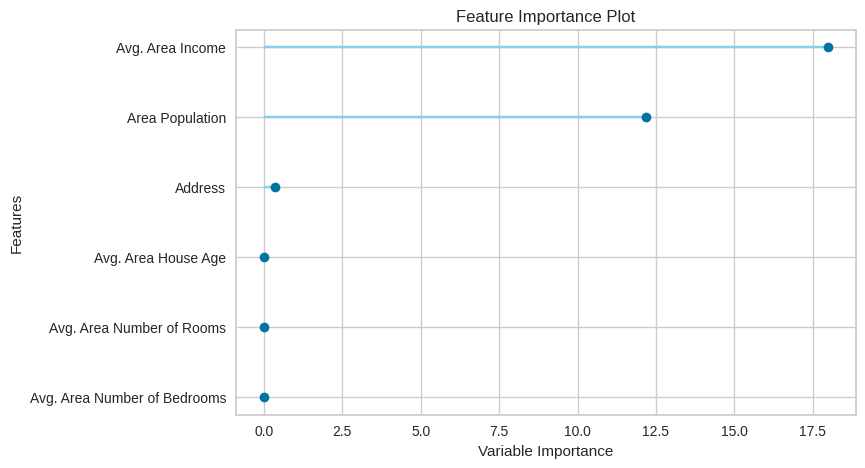

In [ ]:
plot_model(tuned_huber, plot='feature')

In [ ]:
evaluate_model(tuned_huber)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
final_model = finalize_model(tuned_huber)

In [ ]:
print(final_model)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Avg. Area Income',
                                             'Avg. Area House Age',
                                             'Avg. Area Number of Rooms',
                                             'Avg. Area Number of Bedrooms',
                                             'Area Population'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Address'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('rest_encoding',
                 TransformerWrapper(include=['Address'],
                                    transformer=TargetEncoder(cols=['Address'],
                                                              handle_missing='return_nan'))),
                ('clean_column_names',
    

##  Prediction

In [ ]:
unseen_predictions = predict_model(final_model, data=data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,181245.6972,49502074139.1470,222490.6158,0.5836,0.1981,0.1632


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Address,Price,prediction_label
0,80175.757812,4.988408,6.104512,4.04,26748.427734,"06039 Jennifer Islands Apt. 443\nTracyport, KS...",1.068138e+06,1.328568e+06
1,78394.335938,6.989780,6.620478,2.42,36516.359375,"972 Joyce Viaduct\nLake William, TN 17778-6483",1.573937e+06,1.419888e+06
2,50593.695312,4.496513,7.467628,4.49,34343.992188,"911 Castillo Park Apt. 717\nDavisborough, PW 7...",6.637324e+05,8.892766e+05
3,73163.664062,6.919535,5.993188,2.27,32326.123047,"829 Welch Track Apt. 992\nNorth John, AR 26532...",1.291332e+06,1.272220e+06
4,63508.195312,5.947165,7.187774,5.12,35719.652344,Unit 7424 Box 2786\nDPO AE 71255,1.019426e+06,1.140403e+06


## Save Model

In [ ]:
save_model(final_model,'Final Model 25July2023')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Avg. Area Income',
                                              'Avg. Area House Age',
                                              'Avg. Area Number of Rooms',
                                              'Avg. Area Number of Bedrooms',
                                              'Area Population'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Address'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('rest_encoding',
                  TransformerWrapper(include=['Address'],
                                     transformer=TargetEncoder(cols=['Address'],
                                                               handle_missing='return_nan'))),
                 ('clean_col

## Retrive Model

In [ ]:
saved_final_model = load_model('Final Model 25July2023')

Transformation Pipeline and Model Successfully Loaded
